 
 # <font color= Blue ><center>Exploratory data analysis </center></color>

### About Dataset

* This dataset was created to list all shows and movies available on AppleTV+. It was collected from JustWatch in March 2023, containing data available in the United States.

* This dataset contains two files, one for the titles (titles.csv) and the other for the cast (credits.csv) of each movie and show on the platform.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_csv("titles.csv")

In [4]:
df1=pd.read_csv("credits.csv")

## EDA for "titles.csv"

### Sample data

In [5]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm1300,A Charlie Brown Christmas,MOVIE,When Charlie Brown complains about the overwhe...,1965,G,25,"['comedy', 'drama', 'family', 'music', 'animat...",['US'],NaN,tt0059026,8.3,40328.0,10.848,7.688
1,tm71152,"It's the Great Pumpkin, Charlie Brown",MOVIE,"This classic ""Peanuts"" tale focuses on the thu...",1966,G,25,"['animation', 'comedy', 'family']",['US'],NaN,tt0060550,8.2,20299.0,12.458,7.474
2,tm2562,A Charlie Brown Thanksgiving,MOVIE,"Turkey, cranberries, pumpkin pie... and the Pe...",1973,G,25,"['family', 'animation', 'comedy']",['US'],NaN,tt0068359,7.7,11406.0,12.591,7.311
3,tm125274,"Be My Valentine, Charlie Brown",MOVIE,It's Valentine's Day again and Charlie Brown d...,1975,G,25,"['animation', 'family', 'romance', 'comedy']",['US'],NaN,tt0072687,7.4,2777.0,6.981,7.000
4,tm106607,"It's the Easter Beagle, Charlie Brown",MOVIE,"Charlie Brown, Linus and the entire Peanuts ga...",1974,G,25,"['family', 'animation', 'comedy']",['US'],NaN,tt0071679,7.5,3001.0,6.172,6.600


In [6]:
df.shape

(170, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    170 non-null    object 
 1   title                 170 non-null    object 
 2   type                  170 non-null    object 
 3   description           170 non-null    object 
 4   release_year          170 non-null    int64  
 5   age_certification     159 non-null    object 
 6   runtime               170 non-null    int64  
 7   genres                170 non-null    object 
 8   production_countries  170 non-null    object 
 9   seasons               108 non-null    float64
 10  imdb_id               169 non-null    object 
 11  imdb_score            167 non-null    float64
 12  imdb_votes            166 non-null    float64
 13  tmdb_popularity       170 non-null    float64
 14  tmdb_score            167 non-null    float64
dtypes: float64(5), int64(2)

### Datatype for each variable

In [8]:
pd.DataFrame(df.dtypes,columns=["Datatype"])

,Datatype
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


In [9]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

### Missing values in the dataset

In [10]:
pd.DataFrame(df.isnull().sum(),columns=["No.of null values"])

,No.of null values
id,0
title,0
type,0
description,0
release_year,0
age_certification,11
runtime,0
genres,0
production_countries,0
seasons,62


### Check duplicates

In [11]:
df.duplicated().sum()

0

* There are total 170 rows and 15 columns in the dataset.  
* 'id', 'title', 'type', 'description','age_certification',  'genres', 'production_countries', and 'imdb_id' are object type variable. 
* 'release_year','runtime','seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity' and 'tmdb_score' are numerical variable.
* From the above results we can see that the variable 'age_certification' and 'seasons', has more  null values, need to treat them. Also other variable have less number of null values.
* Also checked that there is no duplicate rows.  


**Statiscal Summary**

In [12]:
df.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,170,170,170,170,170.000000,159,170.000000,170,170,108.000000,169,167.000000,166.000000,170.000000,167.000000
unique,170,170,2,170,NaN,10,NaN,97,26,NaN,169,NaN,NaN,NaN,NaN
top,tm1300,A Charlie Brown Christmas,SHOW,When Charlie Brown complains about the overwhe...,NaN,TV-MA,NaN,['documentation'],['US'],NaN,tt0059026,NaN,NaN,NaN,NaN
freq,1,1,108,1,NaN,51,NaN,14,117,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2017.900000,NaN,51.105882,NaN,NaN,1.638889,NaN,7.126347,18139.126506,25.475188,7.189695
std,NaN,NaN,NaN,NaN,10.357315,NaN,35.867449,NaN,NaN,0.869615,NaN,1.011691,42929.993830,38.082373,1.202560
min,NaN,NaN,NaN,NaN,1965.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,2.700000,19.000000,2.902000,2.000000
25%,NaN,NaN,NaN,NaN,2020.000000,NaN,25.000000,NaN,NaN,1.000000,NaN,6.600000,537.750000,5.971000,6.600000
50%,NaN,NaN,NaN,NaN,2021.000000,NaN,45.000000,NaN,NaN,1.000000,NaN,7.300000,2796.000000,10.812500,7.300000
75%,NaN,NaN,NaN,NaN,2022.000000,NaN,61.000000,NaN,NaN,2.000000,NaN,7.800000,14404.000000,26.120750,7.906500


The above table shows the statistical summary of the dataset, that are listed below
* Totaly 170 shows/movies are listed which are released between 1965 and 2023. Among them 108 are TV shows.
* There are 10 different age_certifiction has given for the movies/shows. Most of the shows/movies has "TV-MA" certificate
* Runtime of shows/movies ranges from 0 to 140. But runtime can't be 0,seems it is anomalies.Need to check the data with business team.
* 117 movies/shows are produced from US.Seasons for TV shows are varies from 1 to 5 seasons.
* IMBD ratings for movie/shows ranges from 2.7 to 9.5 and also vot ranges from 19 to 374225
* TMBD score for movies ranges from 2 to 10.

### Univariate Analysis

In [13]:
dfnum= df.select_dtypes(exclude='object')

In [14]:
dfnum=dfnum.drop(['release_year','seasons'],axis=1)

In [15]:
dfnum.head()

,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,25,8.3,40328.0,10.848,7.688
1,25,8.2,20299.0,12.458,7.474
2,25,7.7,11406.0,12.591,7.311
3,25,7.4,2777.0,6.981,7.000
4,25,7.5,3001.0,6.172,6.600


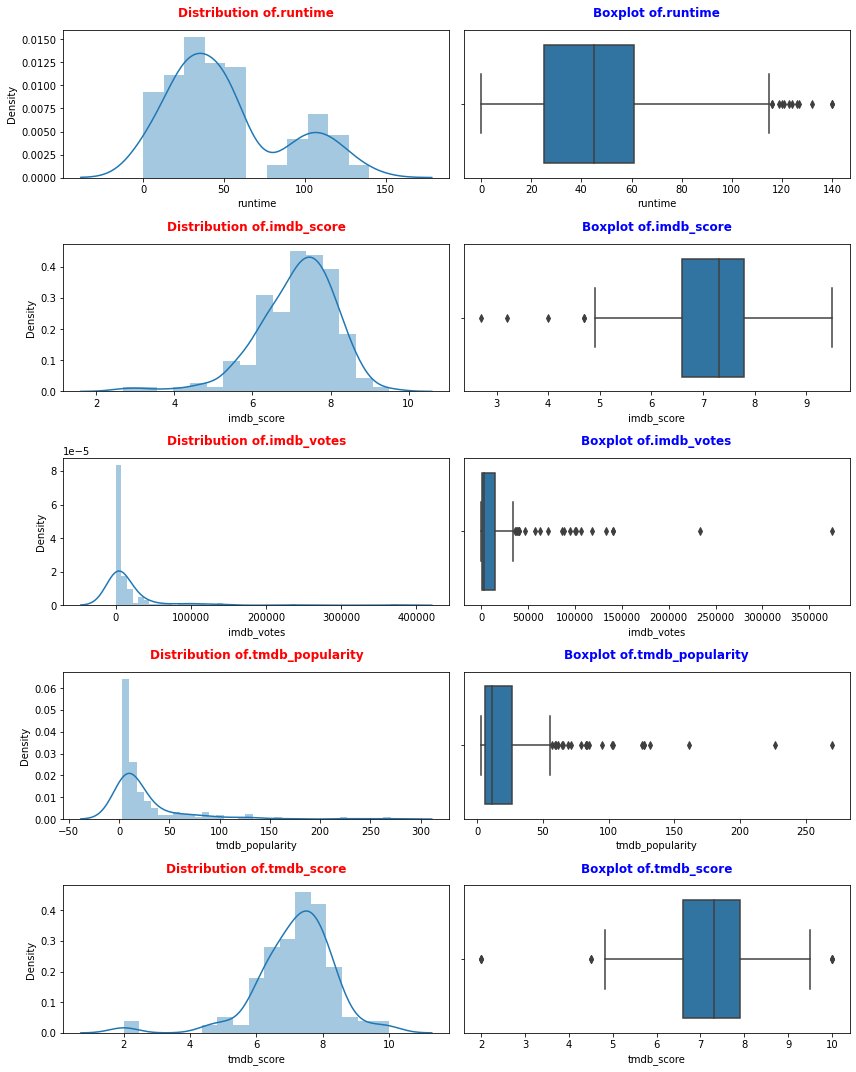

In [16]:
plt.figure(figsize=(12,15))
for i in range(len(dfnum.columns)):
    plt.subplot(5,2,(2*i)+1)
    sns.distplot(dfnum[dfnum.columns[i]])
    plt.title('Distribution of.{}'.format(dfnum.columns[i]),weight='bold',color='red',y=1.05)
    plt.subplot(5,2,(2*i)+2)
    sns.boxplot(dfnum[dfnum.columns[i]])
    plt.title('Boxplot of.{}'.format(dfnum.columns[i]),weight='bold',color='Blue',y=1.05)
    plt.tight_layout()

In [17]:
for i in range(len(dfnum.columns)):
    print ('Skew of',dfnum.columns[i],  '= ',round(dfnum[dfnum.columns[i]].skew(),2))

Skew of runtime =  0.78
Skew of imdb_score =  -1.15
Skew of imdb_votes =  4.97
Skew of tmdb_popularity =  3.43
Skew of tmdb_score =  -1.37


**From the above graph,we can observe the following informations** 

* The variable runtime is moderately right skewed and have many outlier on higher side.
* The variable imdb_score is highlyly left skewed and have some outliers on lower side.
* The variable imdb_votes is highlyly right skewed and have many outlier on higher side.
* The variable tmdb_popularity is highlyly right skewed and have many outlier on higher side.
* The variable tmdb_score is highlyly left skewed and have some outlirs on both side


In [18]:
dfcat=df.drop(dfnum.columns,axis=1)

In [19]:
dfcat=dfcat.drop(['id','title','description','imdb_id'],axis=1)

In [20]:
dfcat.head()

,type,release_year,age_certification,genres,production_countries,seasons
0,MOVIE,1965,G,"['comedy', 'drama', 'family', 'music', 'animat...",['US'],NaN
1,MOVIE,1966,G,"['animation', 'comedy', 'family']",['US'],NaN
2,MOVIE,1973,G,"['family', 'animation', 'comedy']",['US'],NaN
3,MOVIE,1975,G,"['animation', 'family', 'romance', 'comedy']",['US'],NaN
4,MOVIE,1974,G,"['family', 'animation', 'comedy']",['US'],NaN


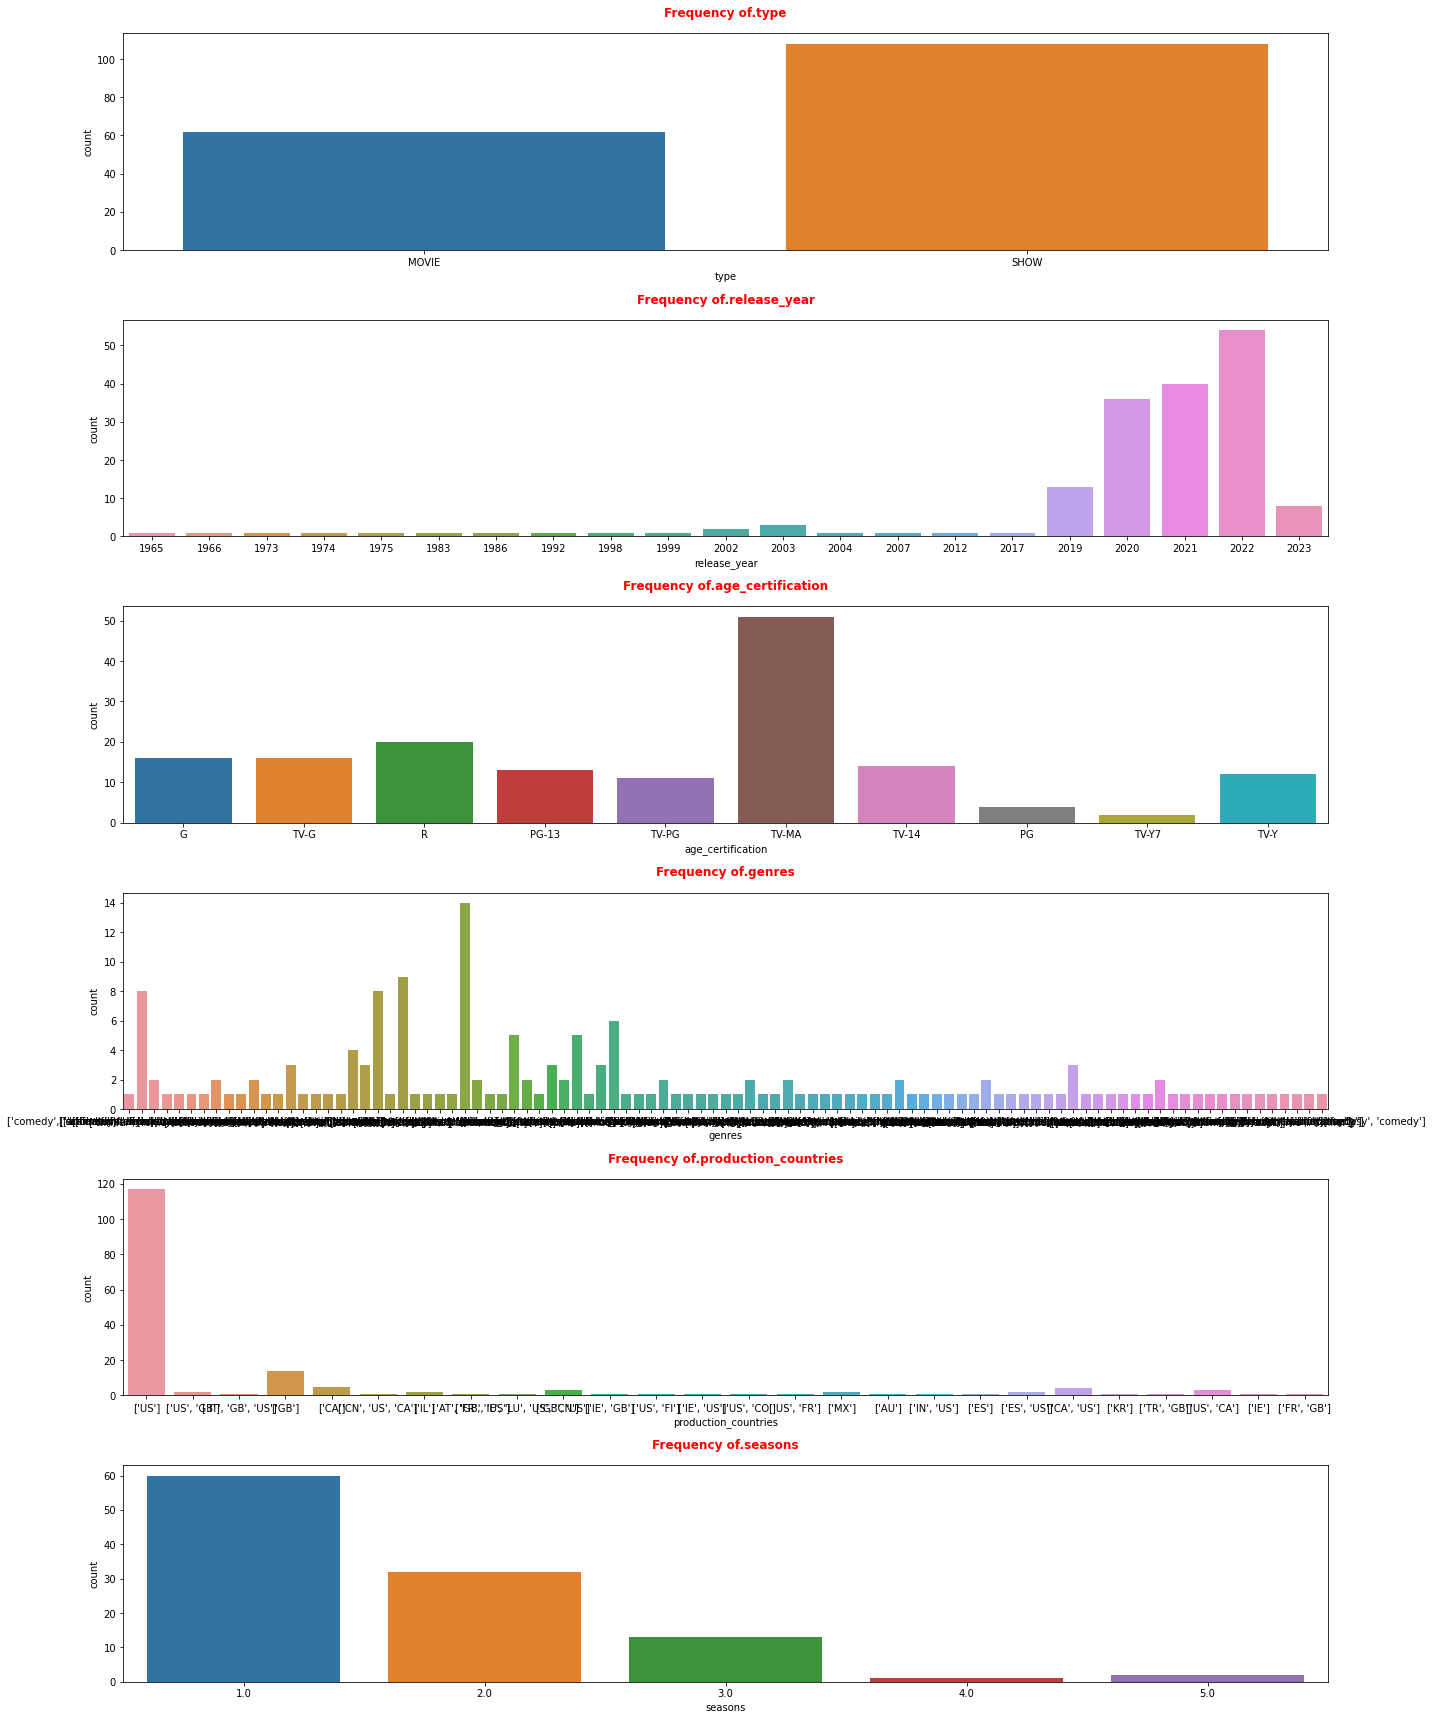

In [21]:
plt.figure(figsize=(20,24))
for i in range(len(dfcat.columns)):
    plt.subplot(6,1,i+1)
    sns.countplot(dfcat[dfcat.columns[i]])
    plt.title('Frequency of.{}'.format(dfcat.columns[i]),weight='bold',color='red',y=1.05)
    plt.tight_layout()

**From the above plots we can observe that**
* Most of them are TV shows a'tvnd most of the movies/shows are produced from US
* Most of the shows has "TV-MA' certification and less nuber of  shows has "TV-YZ" certification.
* Most of the movies/shows have only one season, this is due to movies usually have no following seasons.
* Most of the movies has been released between 2019 to 2023.

**Bivariate Anlysis**

<function matplotlib.pyplot.show(close=None, block=None)>

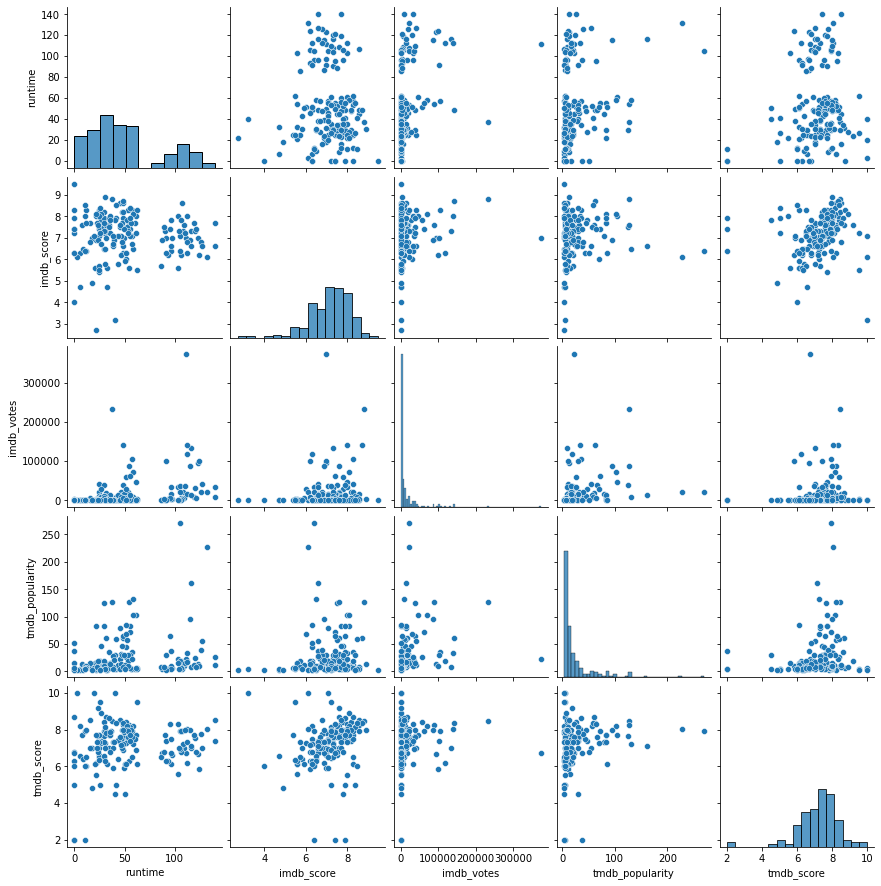

In [22]:
sns.pairplot(dfnum)
plt.show

**The above pair plot shows the relationship between the each variable to each other.We can see that there is a no strong co-relation between any of the variables.The value of co-relation has been explained with the aid of heatmap**

**Heatmap**

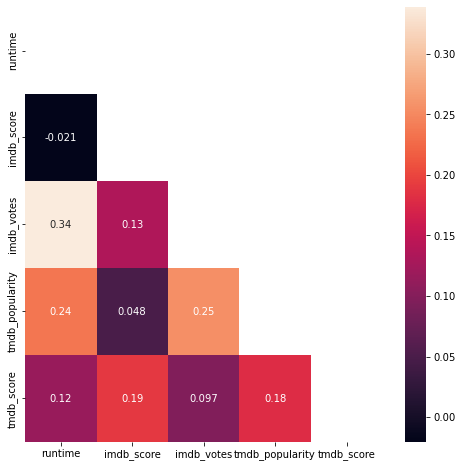

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(dfnum.corr(),annot=True,mask=np.triu(np.ones_like(dfnum.corr(),dtype=np.bool)))
plt.show()

From the above heatap, we can see that there is no significant co-relation between any of the variables.

**Impute null values and Anomalies**

As our dataset is small,having only 170 records. I am imputing datapoints without using any algorithm like KNN imputer.

In [24]:
pd.DataFrame(df.isnull().sum(),columns=["No.of null values"])

,No.of null values
id,0
title,0
type,0
description,0
release_year,0
age_certification,11
runtime,0
genres,0
production_countries,0
seasons,62


* imbd_id is an unqique identifier, it can't be imputed with any values. Either it has replced with correct imbd-id or those  rows should be dropped. Here i, removed those rows, since we have only one null value out of 170(0.5% approx).
* age_certification has 11 null values, it wiled iputd by mode of age_certification.

In [25]:
df[df.seasons.isnull()].type.value_counts()

MOVIE    62
Name: type, dtype: int64

In [26]:
df[df.type=="MOVIE"].seasons.value_counts()

Series([], Name: seasons, dtype: int64)

* seasons has 62 values. we found that all those 62 records are movies. usually seasons is aplicable for TV-SHOW only. i am impuing values with value 1.
* imdb_votes,imbd_score and tmdb_score has some null values. These null values are imputed by their repective median values, Since these variable hae outliers. Medians are less sensitive to outliers.
* Also we have anomalie in variable runtime,runtime can't be 0. It should be replaced mean running time of with repecctive category(show/movie)

In [27]:
df.seasons=df.seasons.fillna(1)

In [28]:
df.age_certification=df.age_certification.fillna('TV-MA')

In [29]:

df.imdb_votes=df.imdb_votes.fillna(df.imdb_votes.median())
df.imdb_score=df.imdb_score.fillna(df.imdb_score.median())
df.tmdb_score=df.tmdb_score.fillna(df.tmdb_score.median())

In [30]:
df=df.dropna()

In [31]:
pd.DataFrame(df.isnull().sum(),columns=["No.of null values"])

,No.of null values
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


In [32]:
df.shape

(169, 15)

In [33]:
df[df.runtime==0].shape

(9, 15)

In [34]:
df[df.runtime==0].value_counts(df.type)

type
SHOW    9
dtype: int64

**We can see that, records which have runtime as 0 are TV-shows. Those values are replaced by mean runtime of shows.**

In [35]:
df.runtime = df.runtime.replace(0,df[df.type=="SHOW"].runtime.mean())

**After imputing missing vaues and anaoalies, our dataset drop to 169 rows**

## EDA for "credits.csv"

In [36]:
df1=pd.read_csv("credits.csv")

### Sample data

In [37]:
df1.head()

,person_id,id,name,character,role
0,96413,tm1300,Peter Robbins,Charlie Brown (voice),ACTOR
1,96416,tm1300,Christopher Shea,Linus Van Pelt (voice),ACTOR
2,96414,tm1300,Tracy Stratford,Lucy Van Pelt (voice),ACTOR
3,96415,tm1300,Cathy Steinberg,Sally Brown (voice),ACTOR
4,149,tm1300,Bill Melendez,Snoopy (voice),ACTOR


In [38]:
df1.shape

(1875, 5)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  1875 non-null   int64 
 1   id         1875 non-null   object
 2   name       1875 non-null   object
 3   character  1770 non-null   object
 4   role       1875 non-null   object
dtypes: int64(1), object(4)
memory usage: 73.4+ KB


### Datatype for each variable

In [40]:
df1.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

### Missing values in the dataset

In [41]:
pd.DataFrame(df1.isnull().sum(),columns=["No.of null values"])

,No.of null values
person_id,0
id,0
name,0
character,105
role,0


In [42]:
df1[df1.role=='DIRECTOR'].character.unique()

array([nan], dtype=object)

In [43]:
df1[df1.role=='DIRECTOR'].shape

(89, 5)

In [44]:
df1[df1.character.isna()][df1[df1.character.isna()].role!="DIRECTOR"].shape

(16, 5)

In [45]:
df1[df1.character.isna()][df1[df1.character.isna()].role!="DIRECTOR"]

,person_id,id,name,character,role
438,590324,ts81913,Aljoscha Stadelmann,NaN,ACTOR
439,1026553,ts81913,Paul Sundheim,NaN,ACTOR
440,41223,ts81913,Samuel Finzi,NaN,ACTOR
443,2047073,ts81913,Kelvin Kilonzo,NaN,ACTOR
445,590052,ts81913,Nina Gummich,NaN,ACTOR
446,589280,ts81913,Godehard Giese,NaN,ACTOR
477,674023,ts224872,Corey Reeser,NaN,ACTOR
478,1423336,ts224872,Matt Tynauer,NaN,ACTOR
509,1862248,tm314230,Lana Ropion,NaN,ACTOR
761,2441766,ts343661,Laney Stiebing,NaN,ACTOR


### Check duplicates

In [46]:
df1.duplicated().sum()

0

* There are total 1875 rows and 5 columns in the dataset.  
* Other than person_id,all other are object type variable.
* From the above results we can see that the variable Character has 105 nul values. Among them 89 are records about director, usualy they don't have charater in movie.Remaining are missing values. But these values are should be replaced with true value.
* Also checked that there is no duplicate rows.  


**Statiscal Summary**

In [47]:
df1.describe(include='all')

,person_id,id,name,character,role
count,1.875000e+03,1875,1875,1770,1875
unique,NaN,157,1671,1334,2
top,NaN,tm1164256,Bill Melendez,Self,ACTOR
freq,NaN,90,17,151,1786
mean,6.357298e+05,NaN,NaN,NaN,NaN
std,8.289775e+05,NaN,NaN,NaN,NaN
min,1.460000e+02,NaN,NaN,NaN,NaN
25%,1.990250e+04,NaN,NaN,NaN,NaN
50%,1.250210e+05,NaN,NaN,NaN,NaN
75%,1.097004e+06,NaN,NaN,NaN,NaN


In [48]:
df1.value_counts('person_id')

person_id
149        17
1129557     8
113461      8
1129452     8
714214      7
           ..
49179       1
48746       1
48574       1
47948       1
2755997     1
Length: 1673, dtype: int64

In [49]:
df1[df1.name=="Bill Melendez"]

,person_id,id,name,character,role
4,149,tm1300,Bill Melendez,Snoopy (voice),ACTOR
10,149,tm1300,Bill Melendez,NaN,DIRECTOR
14,149,tm71152,Bill Melendez,Snoopy (voice),ACTOR
20,149,tm71152,Bill Melendez,NaN,DIRECTOR
27,149,tm2562,Bill Melendez,Snoopy / Woodstock (voice) (uncredited),ACTOR
32,149,tm2562,Bill Melendez,NaN,DIRECTOR
39,149,tm125274,Bill Melendez,Snoopy / Woodstock (voice),ACTOR
47,149,tm106607,Bill Melendez,Snoopy / Woodstock (voice) (uncredited),ACTOR
64,149,tm115354,Bill Melendez,Snoopy / Woodstock (voice) (uncredited),ACTOR
66,149,tm115354,Bill Melendez,NaN,DIRECTOR


The above table shows the statistical summary of the dataset, that are listed below
* person_id is uniqu identifier to identify the person and totaly 1673 uique persons are there.
* id is title of movie/shows where the persons were worked. tm116425 is a movie/show in which most number of persons workded. About 90 persos worked in this move/show.
* Among 1875 person's info, 1786 about actos info and remaining are directors.Some persons done both actor and director.
* There are only 1673 uniques personalities in this dataset.Bill Melendez, person worked in most number of movie/shows. He worked as both actor and director

### Univariate and BivariateAnalysis 

In [60]:
for i in range(len(df1.columns)):
    a=pd.DataFrame(df1.value_counts(df1.columns[i]),columns=['counts'])
    print(a)

           counts
person_id        
149            17
1129557         8
113461          8
1129452         8
714214          7
...           ...
49179           1
48746           1
48574           1
47948           1
2755997         1

[1673 rows x 1 columns]
           counts
id               
tm1164256      90
tm1187561      83
tm470776       65
tm62080        50
tm983754       49
...           ...
ts235703        1
ts287788        1
tm1080335       1
ts221425        1
ts288083        1

[157 rows x 1 columns]
                counts
name                  
Bill Melendez       17
Terry McGurrin       8
Wyatt White          8
Isabella Leo         8
Holly Gorski         7
...                ...
Grayson Eddey        1
Grant Hill           1
Grant Harvey         1
Gracen Newton        1
Ériq Ebouaney        1

[1671 rows x 1 columns]
                        counts
character                     
Self                       151
Self (archive footage)      31
Himself                     22
Char

In [74]:
len(df1.role.unique())

2

In [97]:
for i in range(len(list(df1.name.unique()))):
    a=len(df1[df1.name==list(df1.name.unique())[i]].role.unique())
    if a>1:
        print(df1.name.unique()[i])
        

Bill Melendez
Russ Malkin
David Alexanian
Werner Herzog
Clive Oppenheimer
Spike Jonze
Bryce Dallas Howard
Cooper Raiff
Joe Russo


**From the above analysis of each variable we can observe that**
* Person_id 149 has more more number of records. Bill Melendez had worked in more number of movies than others.
* Self is the Charachter presented in more numbr of times than other charcters.
* Bill Melendez,Russ Malkin,David Alexanian,Werner Herzog,Clive Oppenheimer,Spike Jonze,Bryce Dallas Howard,Cooper Raiff,Joe Russo-These 9 person has donr both the role (ACTOR and Director)